# Data Input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
%load_ext google.colab.data_table

In [3]:
rawdata = pd.read_csv('sample_data/california_housing_train.csv')
rawdata.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

In [5]:
data_olah = rawdata[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']].copy()
data_olah

Output hidden; open in https://colab.research.google.com to view.

In [6]:
data_olah.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [13]:
data_olah.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


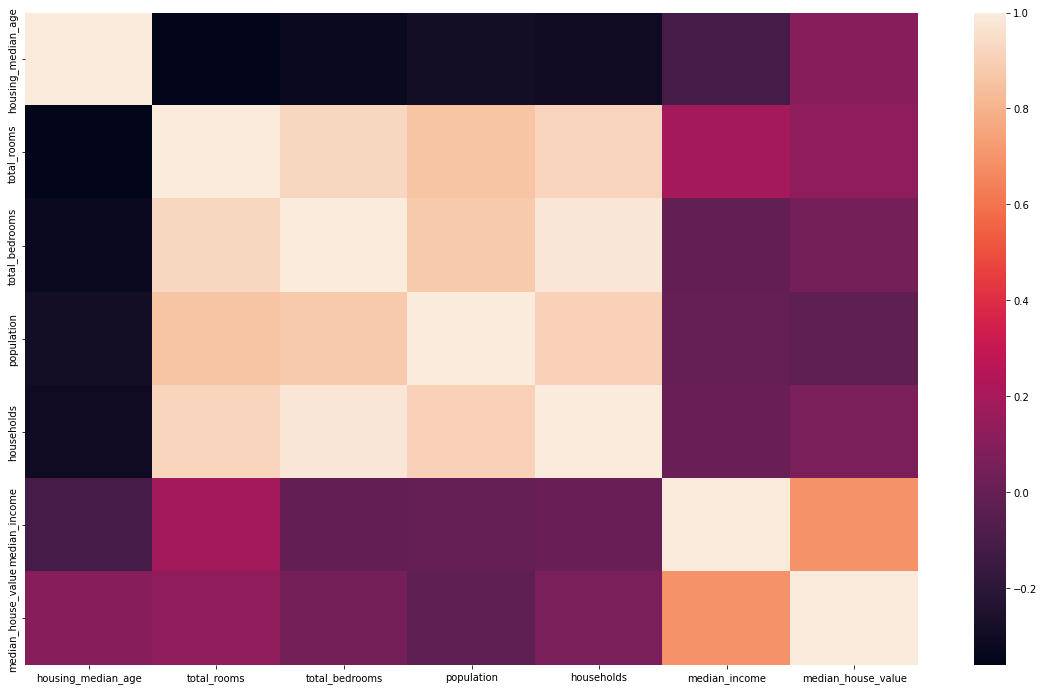

In [9]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 12]
sns.heatmap(data_olah.corr())

In [10]:
X = rawdata[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']].values

Y = rawdata['median_house_value'].values

In [25]:
%whos

Variable           Type                Data/Info
------------------------------------------------
LinearRegression   ABCMeta             <class 'sklearn.linear_mo<...>._base.LinearRegression'>
X                  ndarray             17000x6: 102000 elems, type `float64`, 816000 bytes (796.875 kb)
X_test             ndarray             5610x6: 33660 elems, type `float64`, 269280 bytes (262.96875 kb)
X_train            ndarray             11390x6: 68340 elems, type `float64`, 546720 bytes (533.90625 kb)
Y                  ndarray             17000: 17000 elems, type `float64`, 136000 bytes (132.8125 kb)
data_olah          DataFrame                  housing_median_age<...>n[17000 rows x 7 columns]
df_eva             DataFrame                     real      predi<...>\n[5610 rows x 3 columns]
lr_model           LinearRegression    LinearRegression(copy_X=T<...>obs=None, normalize=True)
np                 module              <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd          

In [12]:
X

array([[1.5000e+01, 5.6120e+03, 1.2830e+03, 1.0150e+03, 4.7200e+02,
        1.4936e+00],
       [1.9000e+01, 7.6500e+03, 1.9010e+03, 1.1290e+03, 4.6300e+02,
        1.8200e+00],
       [1.7000e+01, 7.2000e+02, 1.7400e+02, 3.3300e+02, 1.1700e+02,
        1.6509e+00],
       ...,
       [1.7000e+01, 2.6770e+03, 5.3100e+02, 1.2440e+03, 4.5600e+02,
        3.0313e+00],
       [1.9000e+01, 2.6720e+03, 5.5200e+02, 1.2980e+03, 4.7800e+02,
        1.9797e+00],
       [5.2000e+01, 1.8200e+03, 3.0000e+02, 8.0600e+02, 2.7000e+02,
        3.0147e+00]])

## Split data training

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

# Modelling

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:

lr_model = LinearRegression(normalize=True).fit(X_train, y_train)
lr_model.score(X_train, y_train)


0.5645231968005631

# Evaluation

In [18]:
lr_model.score(X_test, y_test)

0.5826536093176675

In [19]:
y_predict = lr_model.predict(X_test)

In [20]:
df_eva = pd.DataFrame(columns=["real", "predicted"])

In [22]:
df_eva.real = y_test
df_eva.predicted = y_predict
df_eva["error"] = abs(y_test - y_predict)
df_eva

,real,predicted,error
0,142700.0,168041.943036,25341.943036
1,500001.0,436319.465919,63681.534081
2,61800.0,108625.307524,46825.307524
3,162800.0,157678.566327,5121.433673
4,90600.0,137624.001520,47024.001520
...,...,...,...
5605,308900.0,204957.253239,103942.746761
5606,106500.0,196891.114407,90391.114407
5607,93000.0,169421.333859,76421.333859
5608,289600.0,291705.852450,2105.852450


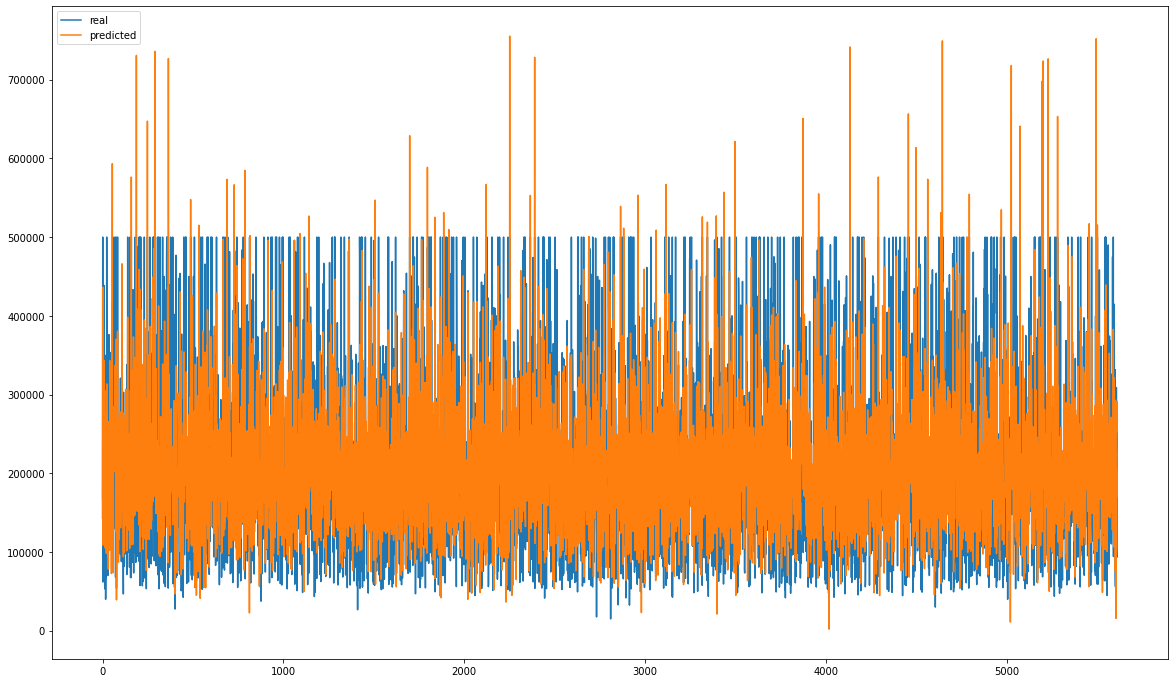

In [24]:
df_eva[["real", "predicted"]].plot()

In [26]:
from joblib import dump, load
dump(lr_model, 'my_lr_model_20211014.joblib') 

['my_lr_model_20211014.joblib']